# HR DATA ANALYSIS PROJECT

### Language used -- Python.

### Importing Python Libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Datasets.

In [2]:
df= pd.read_csv('data.csv')
pd.set_option('display.max_column',None)

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## INTRODUCTION OF PROJECT

#### Target column == "ATTRITION" 
#### Attrition ---> Attrition is the departure of the employees from the company for any reason or in simple words we can say that employee who wanted to leave the company.
#### Attrition Yes ---> Empoylee wants to leave the company.
#### Attrition No ---> Employee do'nt want to leave the company.

### WHAT WE ARE GOING TO DO IN THIS

#### It will uncover the factors that leads the employee to "Attrition"
#### In this project we are going to analyze that how other features of dataset are affecting "Attrition"



## DOMAIN ANALYSIS

#### 1. Age. 
#### 2. Buissiness Travel.
#### 3. Department.
#### 4. Distance from Home.
#### 5. Hourly/Daily/Monthly Rating.
#### 6. Education Field.
#### 7. Job and Enviroment Satisfaction.
#### 8. Job Envolvement.
#### 9. Job Level.
#### 10. Performance Rating.
#### 11. Monthly Income.
#### 12. Performance Salary Hike.

## BASIC CHECKS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

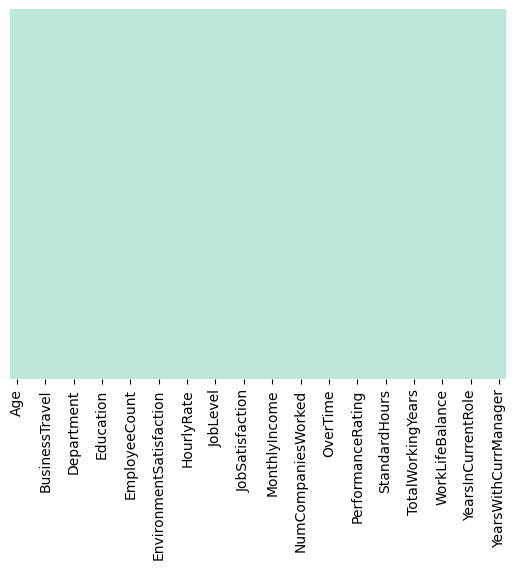

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='icefire')

### Here the above Information and Heatmap tells us that there is no null values present in the Data, so we need not to handle the null values.
### However we can see that there are 9 features or column which are of object datatype. So we have to handle categorical columns for our model creation.

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Here two columns (EmployeeCount, StandardHours) have std==0 , it means they have unique values so they are not able to use in analysis.

In [7]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Here in Over18 we have only one unique value, so no analysis can be done on it.

## EDA (EXPLORATORY DATA ANALYSIS)

### Analysis on Categorical columns w.r.t. target column 'Attrition'

<Axes: xlabel='Attrition', ylabel='count'>

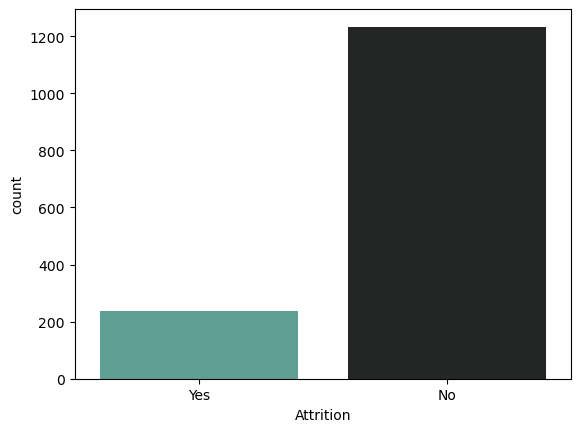

In [8]:
sns.countplot(x=df.Attrition,palette="dark:#5A9_r")

#### Data of Attrition shows that there is more number of 'No' values and less number of 'Yes' values.
#### As we can see that there is a big difference in counts of the values so, we can say that it is an "Imbalance Data".

## 1) Impact of Bussiness Travel on Attrition.

<Axes: xlabel='BusinessTravel', ylabel='count'>

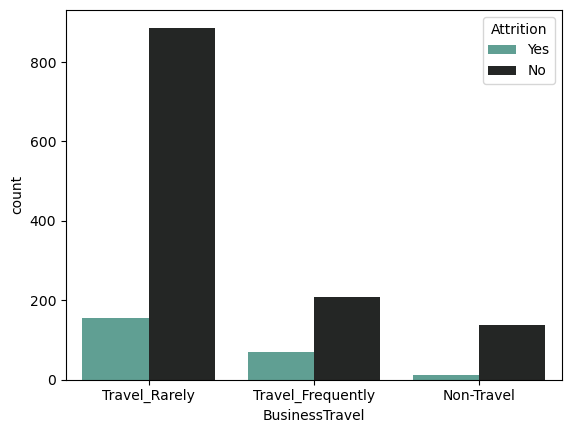

In [9]:
sns.countplot(hue=df.Attrition,x=df.BusinessTravel,palette="dark:#5A9_r")

#### Graph tells us that there are more counts or more number of employees who travels rarely, it means travel rate of company is less.
#### There are more no. of employee who travels rarely and are not satisfied with there job.
#### Non-Traveller has the least count as well as the least Attrition.

## 2) Impact of Department on Attrition.

<Axes: xlabel='Department', ylabel='count'>

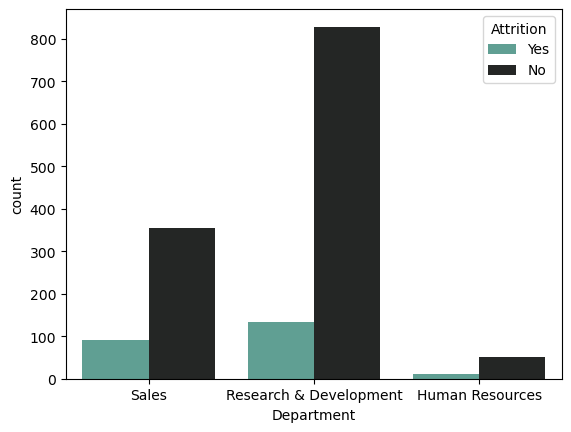

In [10]:
sns.countplot(hue=df.Attrition,x=df.Department,palette="dark:#5A9_r")

#### There are 3 no. of Departments 1) Sales. 2) Research & Development. 3) Human Resources.
#### Research & Development Department have more no. of Attrition (nearly 140 employees) as compared to other two departments.
#### Human Resources Department has the least no. of Attrition.

## 3) Impact of Education field on Attrition.

<Axes: xlabel='Attrition', ylabel='count'>

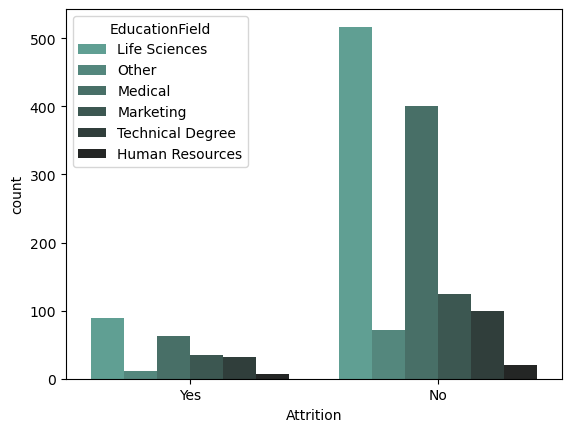

In [11]:
sns.countplot(x=df.Attrition,hue=df.EducationField,palette="dark:#5A9_r")

#### First and the foremost thing is that employees who are from 'Life Science' & 'Medical' background are more as compared to other Education Field.
#### Nearly 100 employees are there who are from 'Life Science' background wants to leave the company and followed by the 'Medical' background employee. 

#### As we concluded from analysis of Department and Attrition, here also Human Resources educational background employees has the least Attrition. 

## 4) Gender and Attrition.

<Axes: xlabel='Attrition', ylabel='count'>

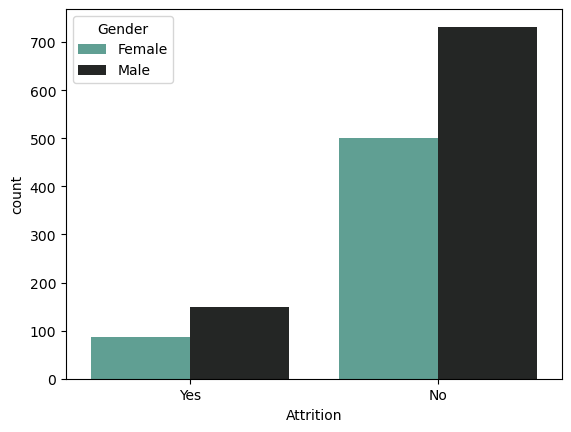

In [12]:
sns.countplot(x=df.Attrition,hue=df.Gender,palette="dark:#5A9_r")

#### Graph shows that Male Employees are more than Female Employees.
#### Males are more likely to quit there job as compared to Females.

## 5) Overtime and Attrition.

<Axes: xlabel='OverTime', ylabel='count'>

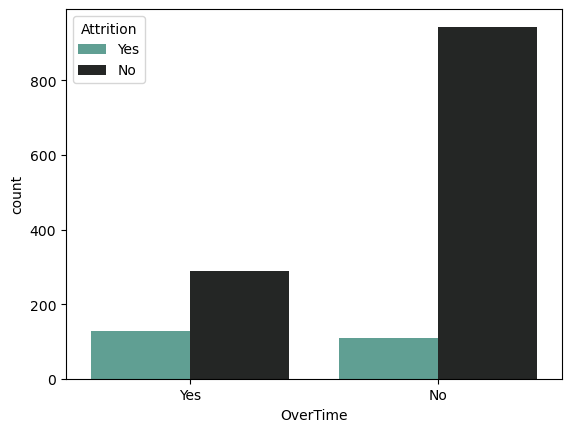

In [13]:
sns.countplot(hue=df.Attrition,x=df.OverTime,palette="dark:#5A9_r")

#### As for 'Attrition Yes' there is a minor difference between the employees who are doing overtime and the employees who are not doing overtime.
#### So we can say that 'OverTime' feature is not much effecting 'Attrition'.
#### But we can conclude that most of the employees are not doing overtime.

## 6) Impact of Job Role on Attrition.

Text(0.5, 0, 'JobRole')

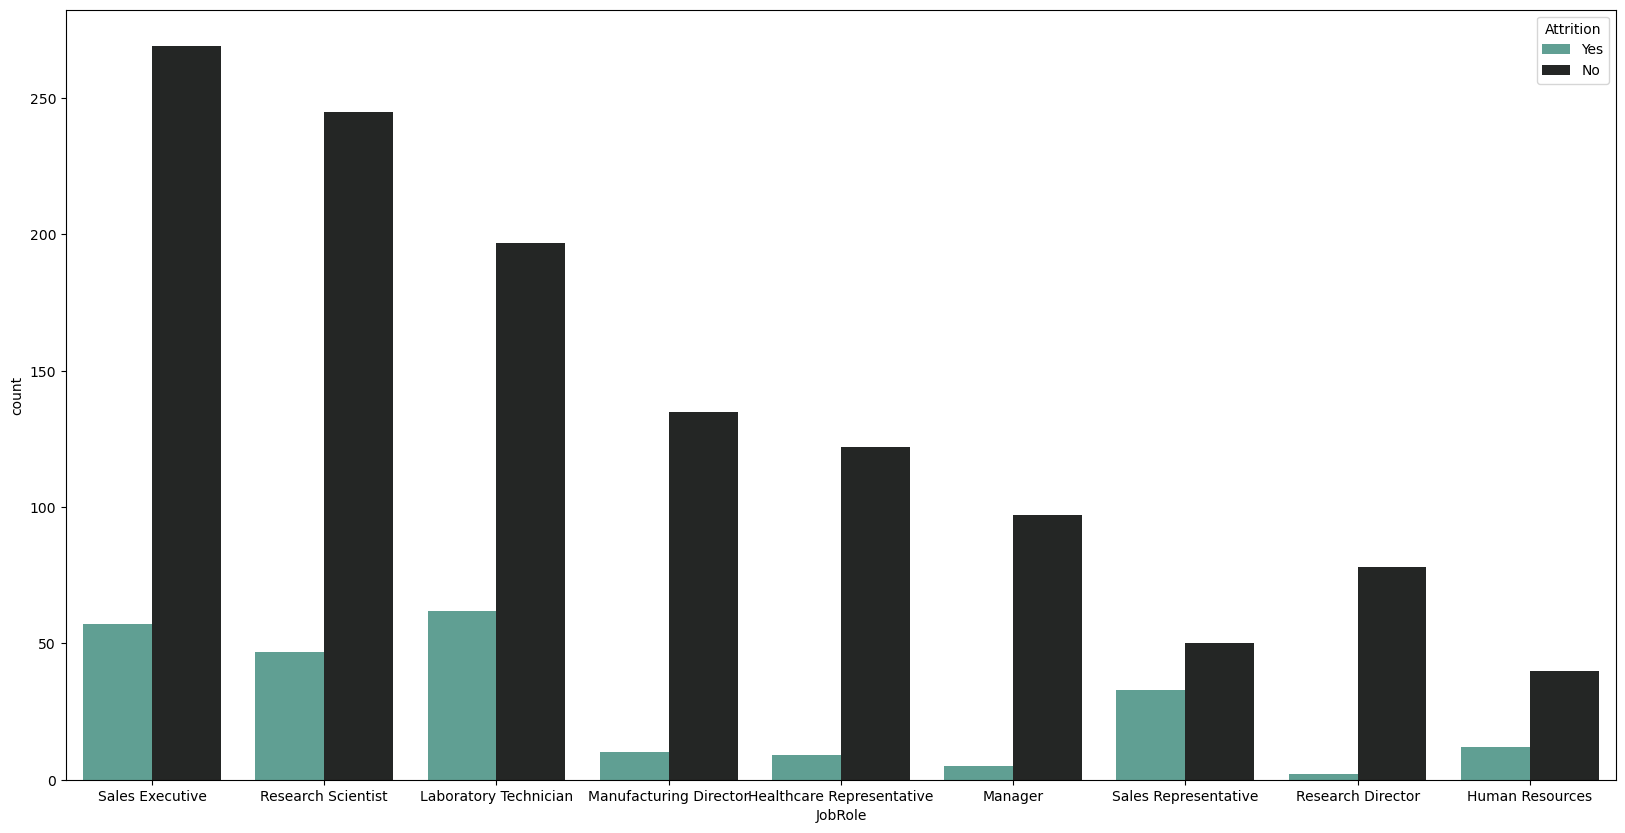

In [14]:
plt.figure(figsize=(20,10),facecolor='white')
sns.countplot(hue=df.Attrition,x=df.JobRole,palette="dark:#5A9_r")
plt.xlabel('JobRole',fontsize=10)

#### There are very less no. of Research Director who wants to leave company.
#### Laboratory Technician, Sales Executive and Research Scientist are the top 3 Jobe Roles having there Attrition "Yes".
#### Apart from these it can be seen that there are highest no. of employee in the Sales Executive Job Role.

## ANALYSIS ON COUNTINOUS DATA W.R.T. ATTRITION

In [15]:
numerical_cols = []
for column in df.columns:
    if df[column].dtype == "int64" and len (df[column].unique())>= 10:
        numerical_cols.append(column)

In [16]:
numerical_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### GRAPHICAL REPRESENTATION OF COUNTINOUS DATA

In [17]:
df2=df[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

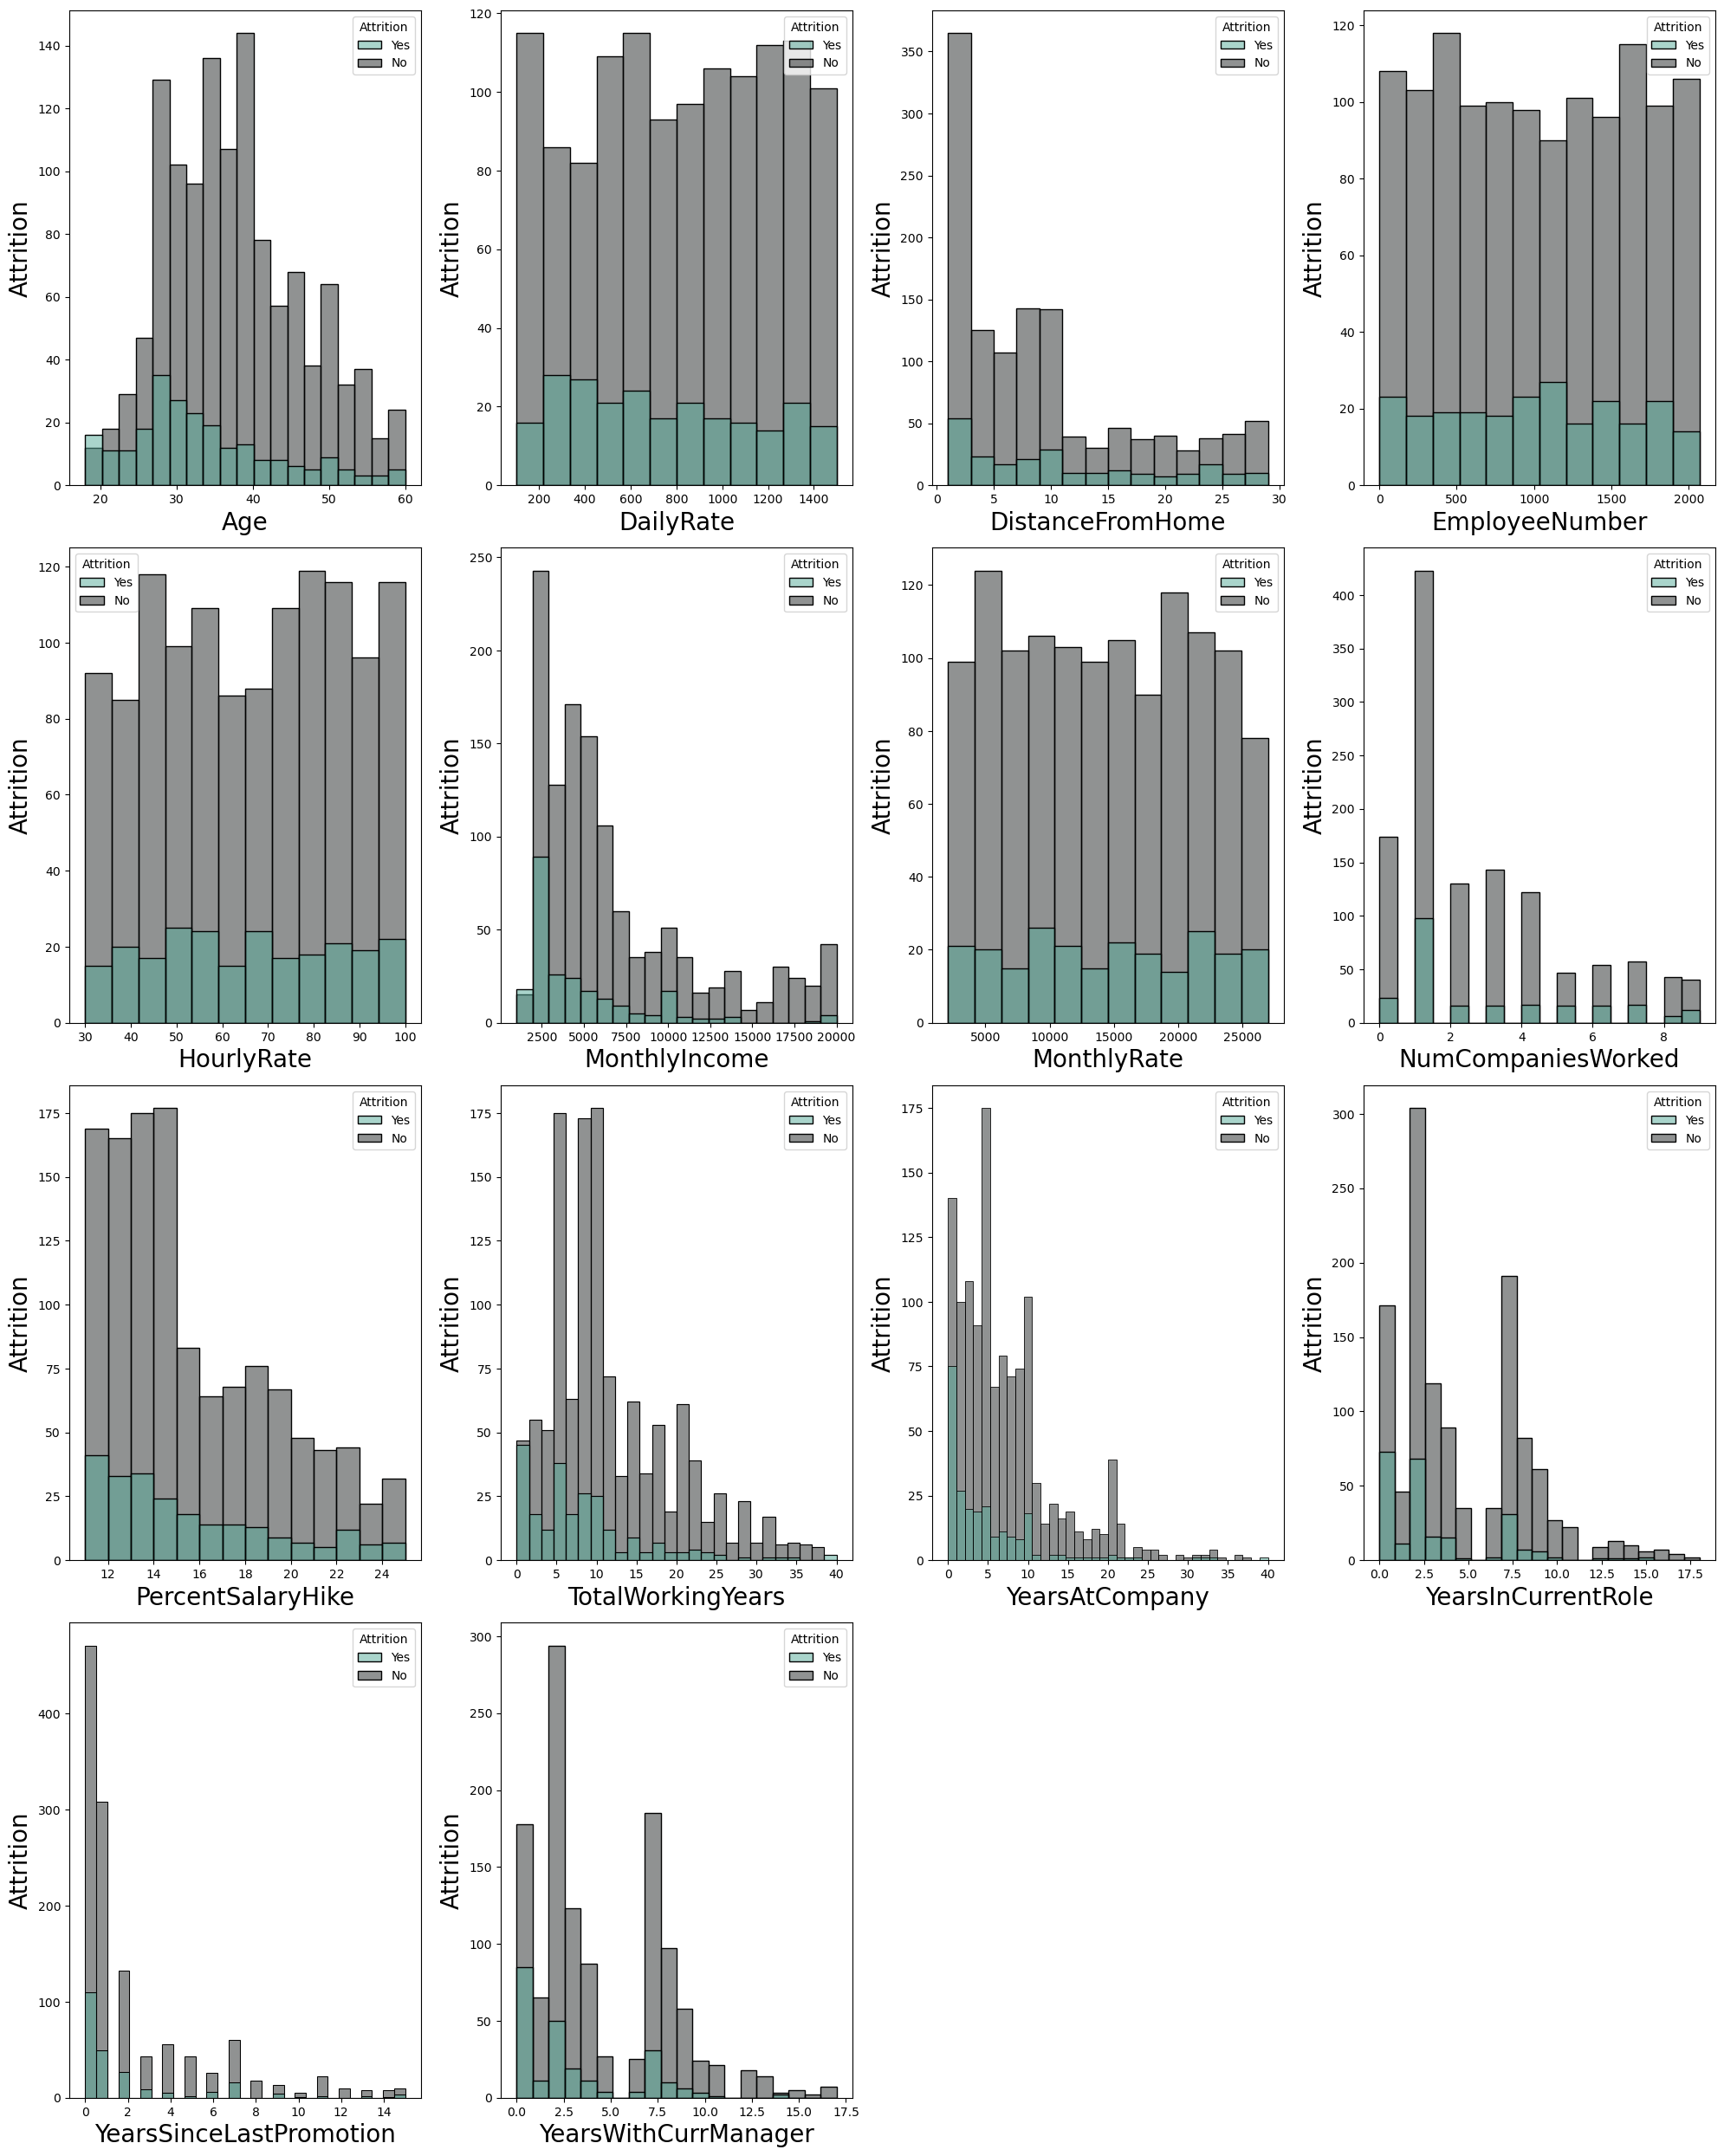

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df2:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=df2[column].dropna(axis=0),hue=df.Attrition,palette="dark:#5A9_r")
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### 1) Impact of Age on Atrrition.

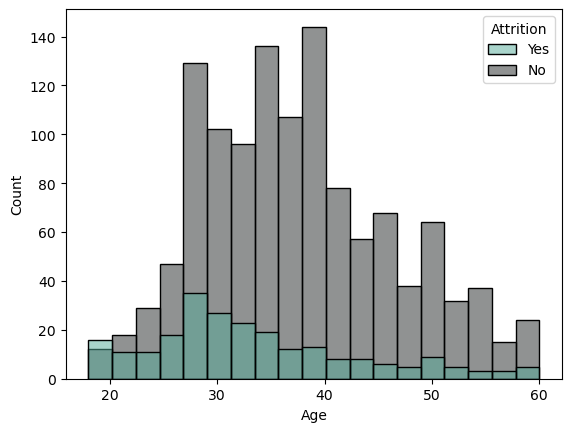

In [19]:
sns.histplot(hue=df.Attrition,x=df.Age,palette="dark:#5A9_r")
plt.show()

#### Employees with the age group of 25 - 35 are more likely to leave the company.
#### After the age of 40 the distribution tells us that 'Higher the age Lesser will be Attrition'.

### 2) Impact of Distance from Home on Attrition.

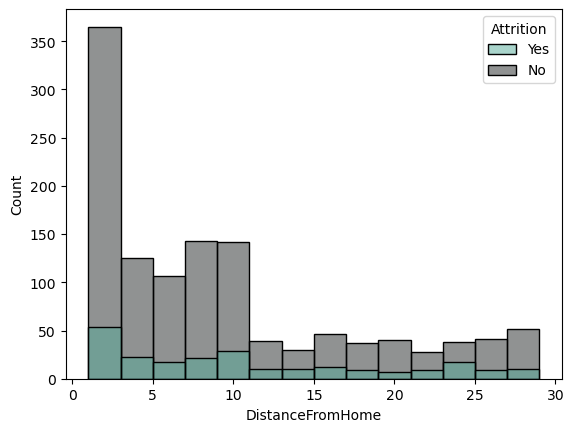

In [20]:
sns.histplot(hue=df.Attrition,x=df.DistanceFromHome,palette="dark:#5A9_r")
plt.show()

#### Employees who has distance range of 0 - 10km are more likely to leave the company.
#### We can also conclude that there are more employees that are living in the range of 10km from the company.

### 3) How Monthly Income gives trend w.r.t. Attrition.

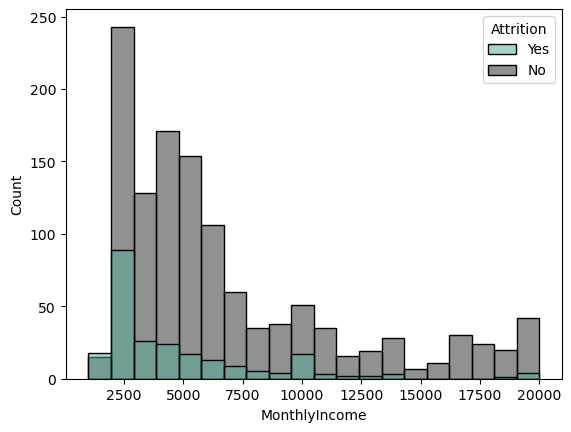

In [21]:
sns.histplot(hue=df.Attrition,x=df.MonthlyIncome,palette="dark:#5A9_r")
plt.show()

#### From the graph we can conclude that the employees getting salary between the range of 2500 - 5000 Rs are more likely to leave the company.
#### Higher the monthly income give rise to lesser Attrition.

### 4) Impact of No. of Companies Worked.

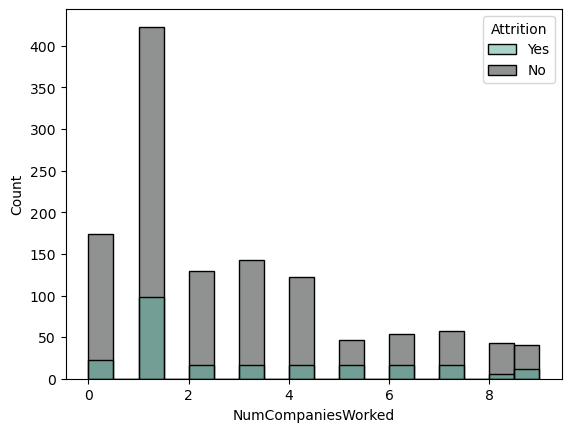

In [22]:
sns.histplot(hue=df.Attrition,x=df.NumCompaniesWorked,palette="dark:#5A9_r")
plt.show()

#### Only that Employees (nearly 100 employees) who had worked with 1 company before have the most amount of Attrition (Attriton=Yes), rest have similar data.

### 5) How Salary Hike is affecting Attrition.

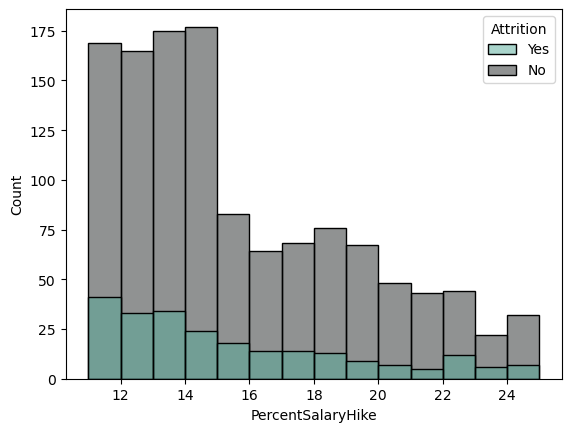

In [23]:
sns.histplot(hue=df.Attrition,x=df.PercentSalaryHike,palette="dark:#5A9_r")
plt.show()

#### Higher the Percent of Salary Hike lesser the Attrition ('No').

### 6) Years at the Company.

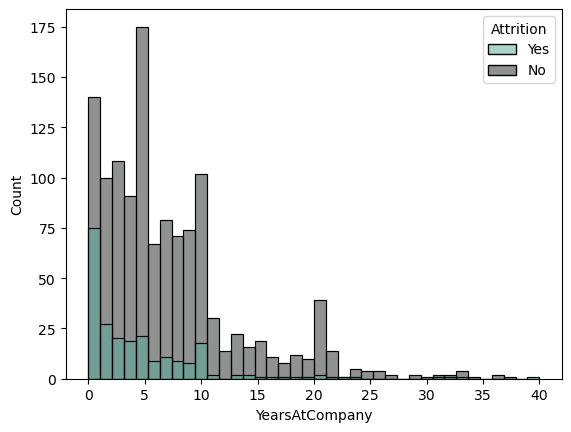

In [24]:
sns.histplot(hue=df.Attrition,x=df.YearsAtCompany,palette="dark:#5A9_r")
plt.show()

#### Freshers are more likely to leave the company nearly about 75 Fresher or more than half of the Freshers.
#### Apart from that Employee who ranges from 0 - 10 years working on this company are so likely to quit there job.

## ANALYSIS OF DISCRETE DATA W.R.T. ATTRITION

In [25]:
discrete_cols = []
for column in df.columns:
    if df[column].dtype == 'int64' and len(df[column].unique())<= 10:
        discrete_cols.append(column)

In [26]:
discrete_cols

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [27]:
df3=df[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]

### GRAPHICAL REPRESENTATION

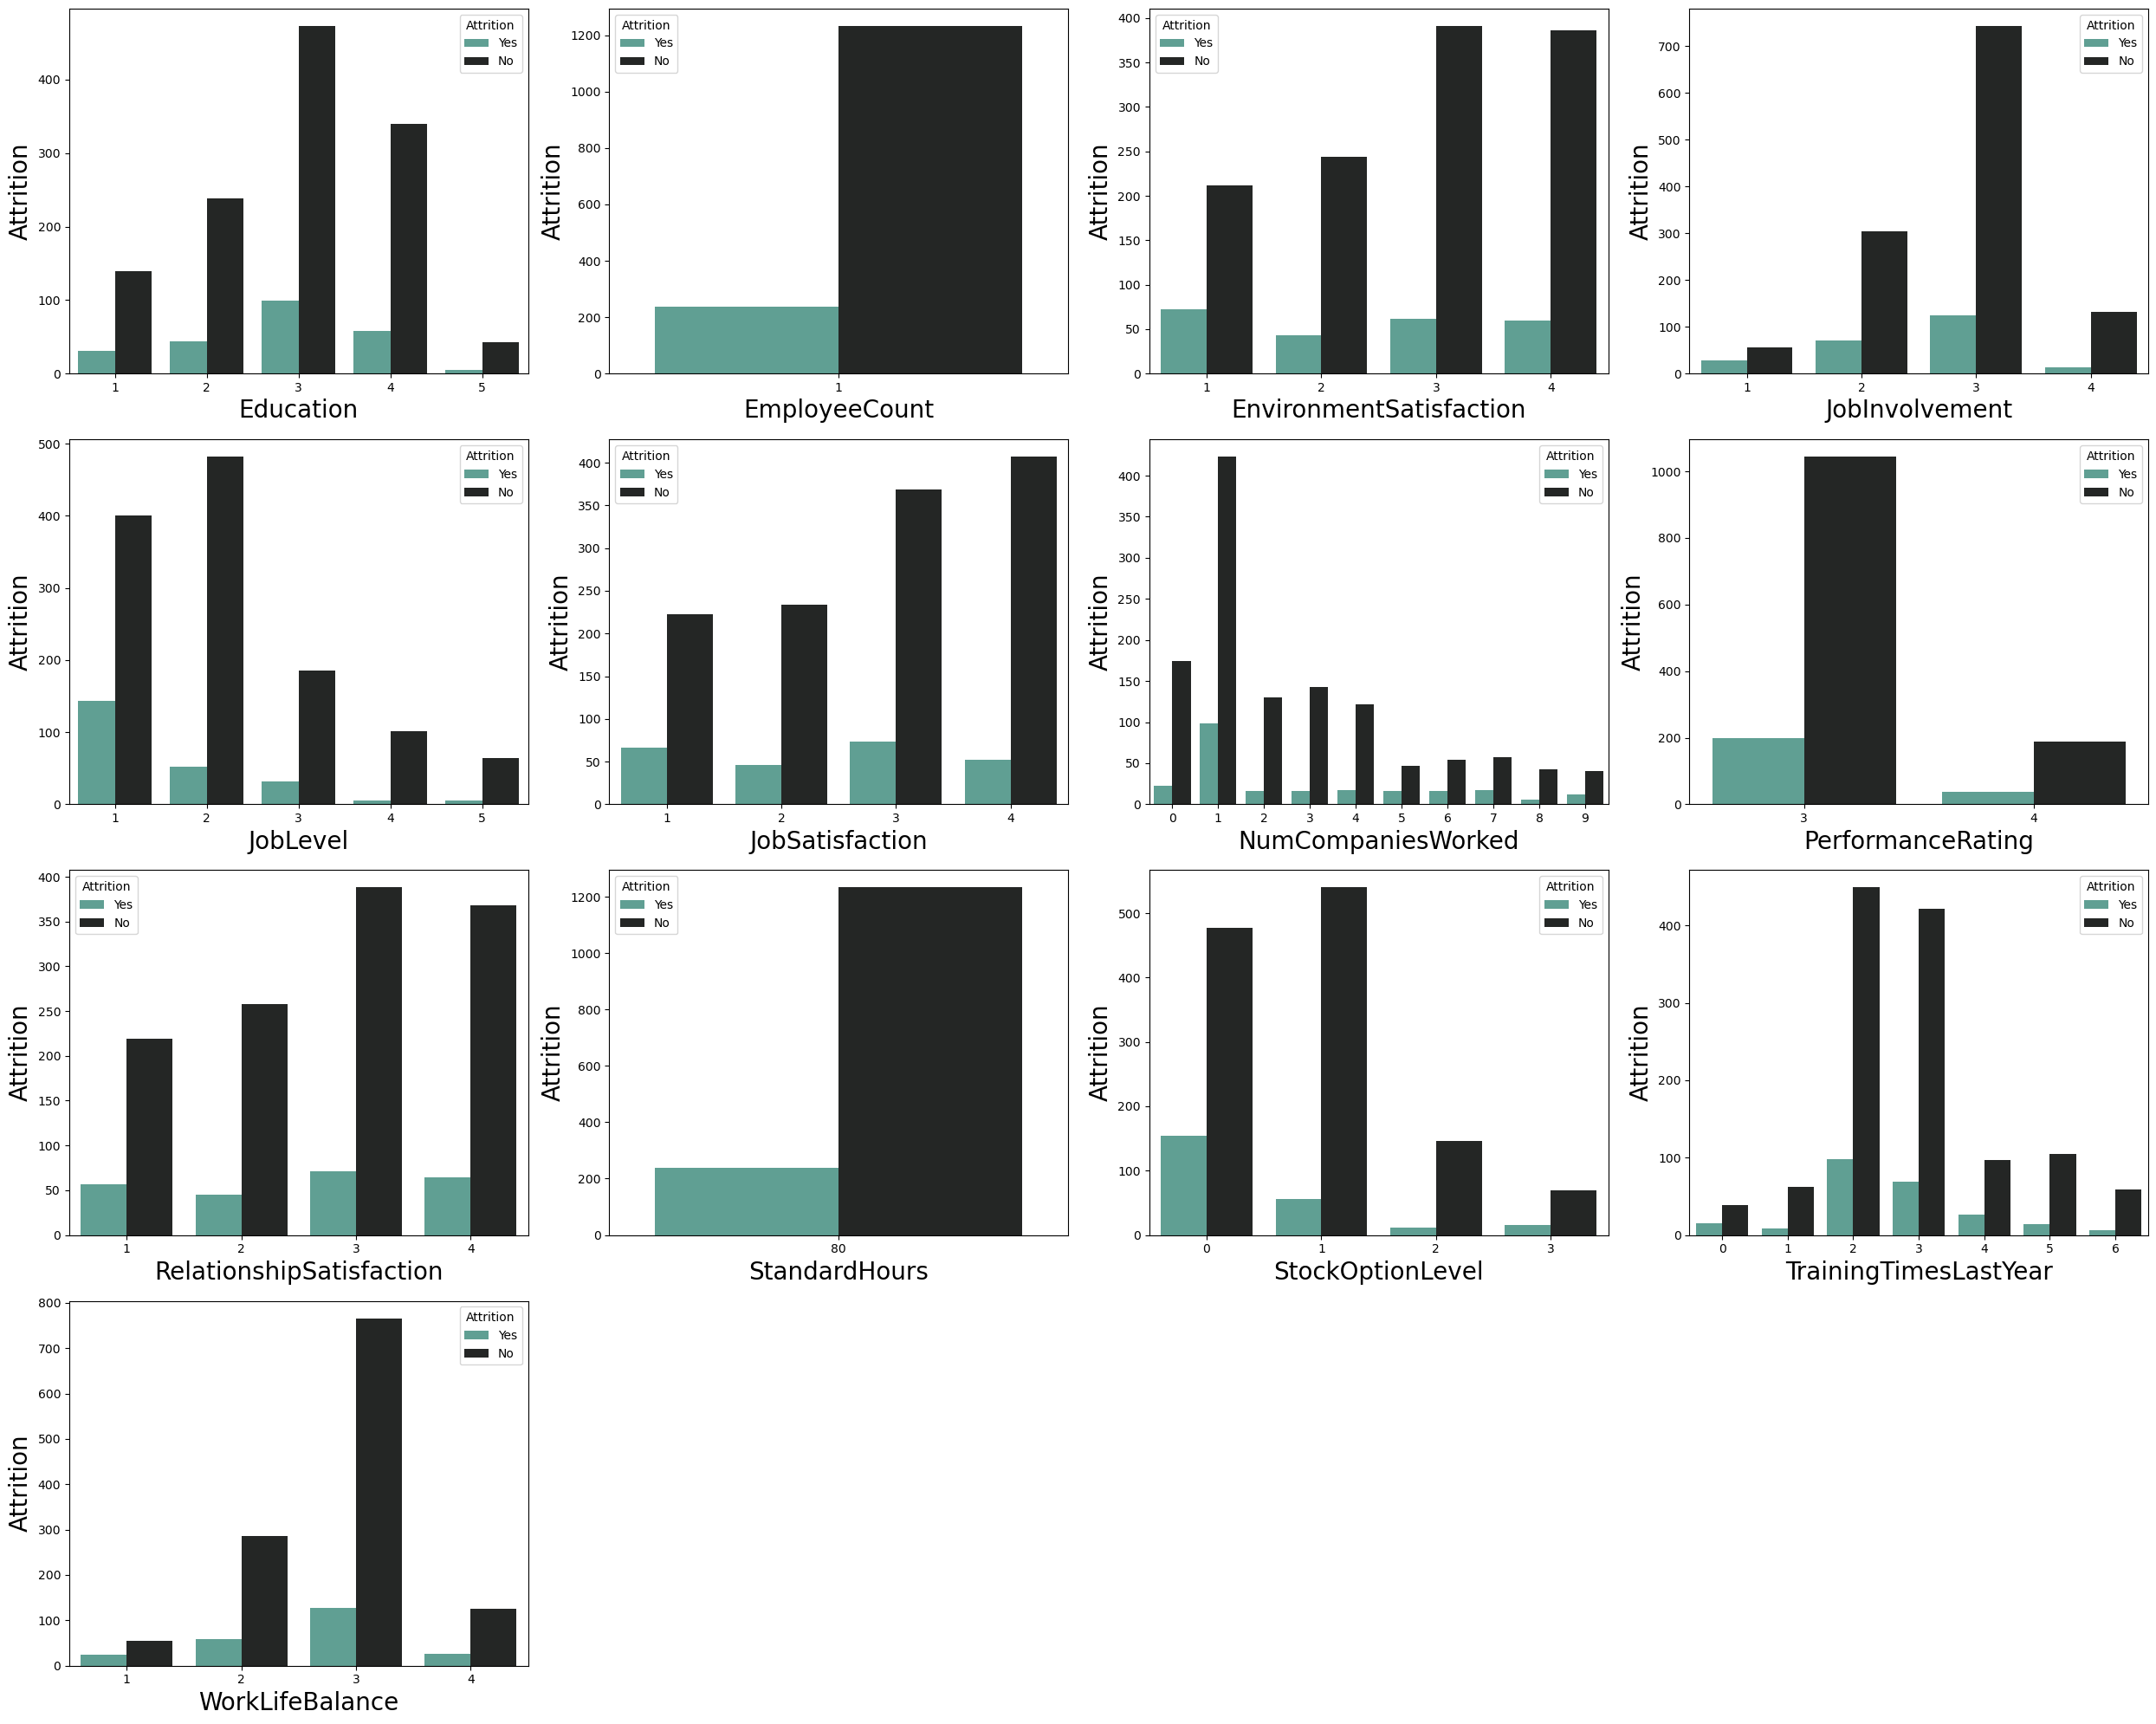

In [28]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber = 1

for column in df3:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=df3[column].dropna(axis=0),hue=df.Attrition,palette="dark:#5A9_r")
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber += 1
plt.tight_layout()

### 1) Impact of Enviroment and Job Satisfaction on Attrition.

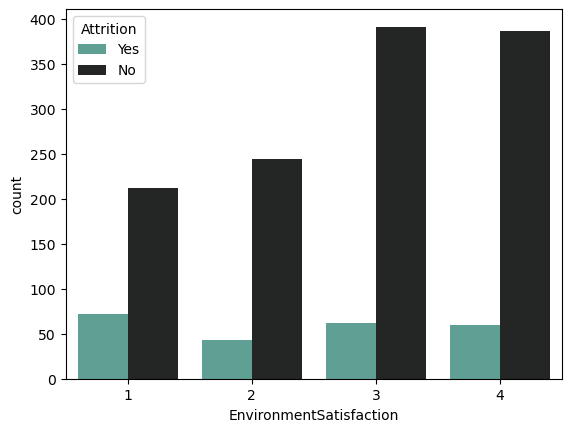

In [29]:
sns.countplot(hue=df.Attrition,x=df.EnvironmentSatisfaction,palette="dark:#5A9_r")
plt.show()

#### Increase in rate of Enviroment satisfaction leads to decrease in Attrition ('No') means not willing to quit.

### 2) How Job Level is affecting Attrition.

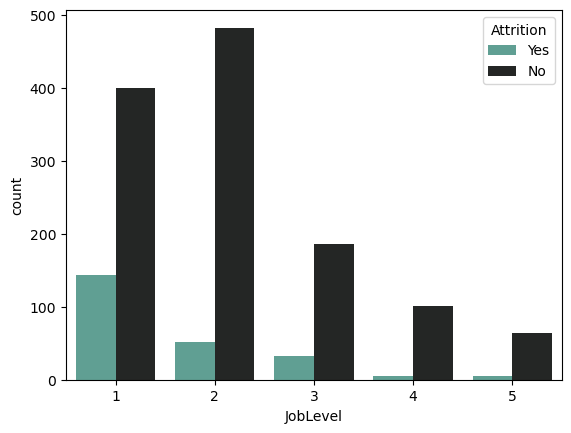

In [30]:
sns.countplot(hue=df.Attrition,x=df.JobLevel,palette="dark:#5A9_r")
plt.show()

#### If there is increase in the level of Job then there is lower number of Attrition ("No") count.  

### 3) Impact of Job involvement on Attrition.

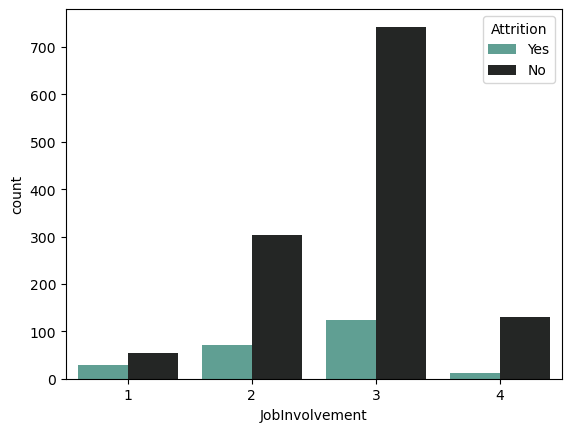

In [31]:
sns.countplot(hue=df.Attrition,x=df.JobInvolvement,palette="dark:#5A9_r")
plt.show()

#### Employees who are involved in there job more than sufficient are more likely to quit their job or we can say that they have more pressure of work.
#### Somehow there are some employee who are not fully involved in their job but still they are willing to quit.

### 4) Impact of Stock option level on Attrition.

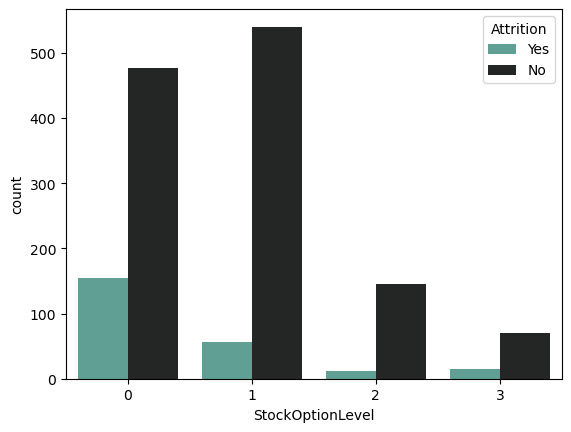

In [32]:
sns.countplot(hue=df.Attrition,x=df.StockOptionLevel,palette="dark:#5A9_r")
plt.show()

#### Higher the level of Stock Option lower the no. of Attrition.

### 5) Performance Rating and Attrition.

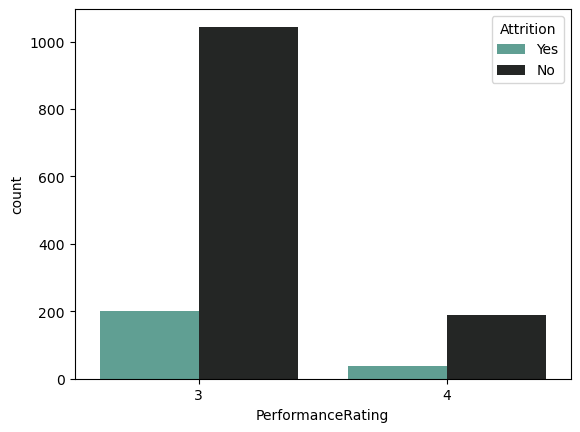

In [33]:
sns.countplot(hue=df.Attrition,x=df.PerformanceRating,palette="dark:#5A9_r")
plt.show()

#### On an average, most of the employees moderately performed(because rating lies between 3-4).
#### However we can say that employees having lower rating are likely to quit or we can say that the company want to fire them.

## DATA PRE-PROCESSING

In [ ]:
df.isnull().sum

### CATEGORICAL DATA HANDLING

In [35]:
df.Attrition=df.Attrition.map({'Yes':0,'No':1})

In [36]:
df.BusinessTravel=df.BusinessTravel.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [37]:
df.Department=df.Department.map({'Research & Development':2,'Sales':1,'Human Resources':0})

In [75]:
df.EducationField=df.EducationField.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0})

In [39]:
df.Gender=pd.get_dummies(df.Gender,drop_first=True)

In [40]:
df.JobRole=df.JobRole.map({'Laboratory Technician':8,'Sales Executive':7,'Research Scientist':6,'Sales Representative':5,'Human Resources':4,'Manufacturing Director':3,'Healthcare Representative':2,'Manager':1,'Research Director':0})

In [41]:
df.MaritalStatus=df.MaritalStatus.map({'Single':2,'Married':1,'Divorced':0})

In [42]:
df.OverTime=df.OverTime.map({'Yes':1,'No':0})

In [ ]:
df.info()

### FEATURE SELECTION

### Droping unique ones.

In [83]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

### MODEL CREATION

In [84]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

### BALANCING THE TARGET COLUMN USING SMOTE

In [87]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm= SMOTE()
print('Unbalanced Data:',Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)
print('Balanced Data:',Counter(y_sm))

Unbalanced Data: Counter({1: 1233, 0: 237})
Balanced Data: Counter({0: 1233, 1: 1233})


### TRAIN-TEST-SPLIT

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,random_state=42,test_size=0.25)

In [90]:
df.Attrition.value_counts()

Attrition
1    1233
0     237
Name: count, dtype: int64

### MODEL BUILDING

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

### PREDICTION

In [91]:
y_pred=dt.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [92]:
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       306
           1       0.83      0.77      0.80       311

    accuracy                           0.81       617
   macro avg       0.81      0.81      0.81       617
weighted avg       0.81      0.81      0.81       617



### CHECKING DATA IS FULLY TRAINED OR NOT

In [94]:
train_pred=dt.predict(x_train)

In [95]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       922

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



### RANDOM FOREST TECHNIQUE

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rfc= RandomForestClassifier(n_estimators=100)

In [98]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [99]:
y_prediction=rfc.predict(x_test)

In [100]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       306
           1       0.89      0.92      0.90       311

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617

